In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fsspec
import geopandas as gpd
import requests
import os
import seaborn as sns

In [3]:
df = pd.read_csv('database.csv')
# Procesamiento de fechas
df['Date'] = pd.to_datetime(df['Date'], format='mixed', utc=True)
df['Year'] = df['Date'].apply(lambda x: x.year)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   Date                        23412 non-null  datetime64[ns, UTC]
 1   Time                        23412 non-null  object             
 2   Latitude                    23412 non-null  float64            
 3   Longitude                   23412 non-null  float64            
 4   Type                        23412 non-null  object             
 5   Depth                       23412 non-null  float64            
 6   Depth Error                 4461 non-null   float64            
 7   Depth Seismic Stations      7097 non-null   float64            
 8   Magnitude                   23412 non-null  float64            
 9   Magnitude Type              23409 non-null  object             
 10  Magnitude Error             327 non-null    float64       

In [2]:
df['Magnitude Source'].unique()

df['Status'].unique()

NameError: name 'df' is not defined

In [14]:
tipos_magnitud_mw = ['MW', 'MWC', 'MWB', 'MWW', 'MWR']

# Filtramos
df_mw_family = df[df['Magnitude Type'].isin(tipos_magnitud_mw)].copy()

In [9]:
df_mw_family

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year
0,1965-01-02 00:00:00+00:00,13:44:18,19.2460,145.6160,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
1,1965-01-04 00:00:00+00:00,11:29:49,1.8630,127.3520,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
2,1965-01-05 00:00:00+00:00,18:05:58,-20.5790,-173.9720,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
3,1965-01-08 00:00:00+00:00,18:49:43,-59.0760,-23.5570,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
4,1965-01-09 00:00:00+00:00,13:32:50,11.9380,126.4270,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23402,2016-12-24 00:00:00+00:00,03:58:55,-5.1460,153.5166,Earthquake,30.0,1.8,NaN,5.8,MWW,...,14.0,1.648,7.0,0.85,US10007MFP,US,US,US,Reviewed,2016
23403,2016-12-25 00:00:00+00:00,14:22:27,-43.4029,-73.9395,Earthquake,38.0,1.9,NaN,7.6,MWW,...,29.0,0.351,6.8,0.80,US10007MN3,US,US,US,Reviewed,2016
23405,2016-12-27 00:00:00+00:00,23:20:56,45.7192,26.5230,Earthquake,97.0,1.8,NaN,5.6,MWW,...,14.0,0.465,5.1,0.78,US10007N3R,US,US,US,Reviewed,2016
23409,2016-12-28 00:00:00+00:00,12:38:51,36.9179,140.4262,Earthquake,10.0,1.8,NaN,5.9,MWW,...,91.0,0.992,4.8,1.52,US10007NAF,US,US,US,Reviewed,2016


## Histogranma

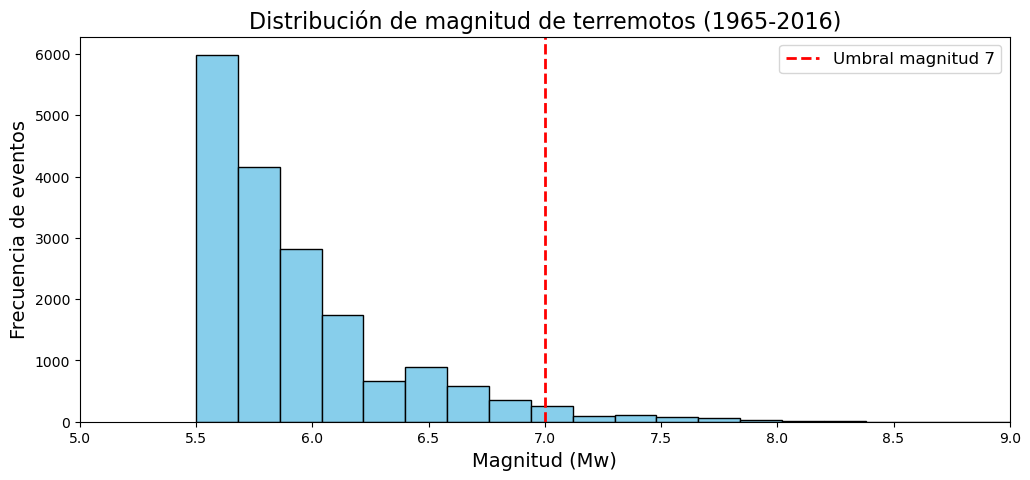

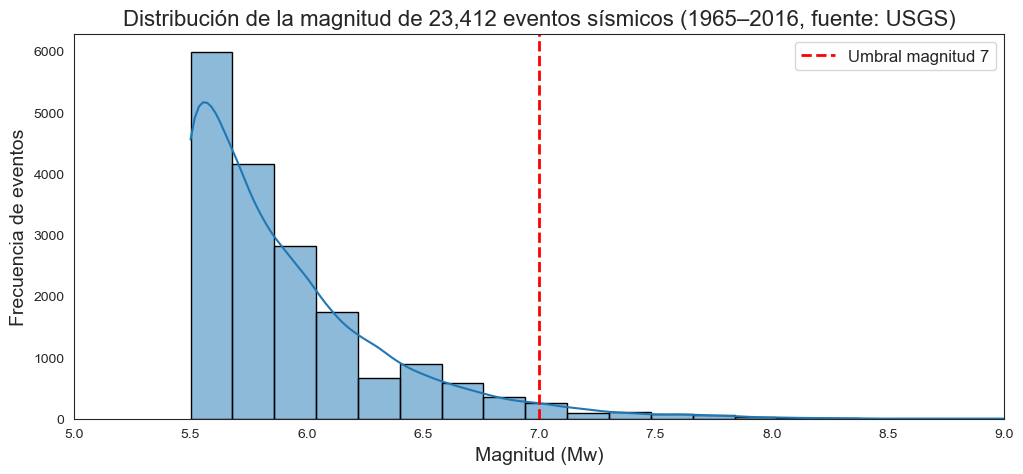

In [15]:
"""## Histograma de magnitudes"""

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

# Histograma con color y bordes definidos
color_hist = 'skyblue'
edge_color = 'black'
ax.hist(df_mw_family['Magnitude'].dropna(), bins=20, color=color_hist, edgecolor=edge_color)

# Títulos y etiquetas con mayor claridad
ax.set_title('Distribución de magnitud de terremotos (1965-2016)', fontsize=16)
ax.set_xlabel('Magnitud (Mw)', fontsize=14)
ax.set_ylabel('Frecuencia de eventos', fontsize=14)
ax.grid(False)  # Removemos la cuadrícula

# Ajuste del rango del eje X
ax.set_xlim(5, 9)

# Señalar la zona de interés: magnitud 7
ax.axvline(x=7, color='red', linestyle='--', linewidth=2, label='Umbral magnitud 7')
ax.legend(fontsize=12)

plt.show()

# Segundo histograma
plt.figure(figsize=(12, 5))

# Histograma con curva KDE
sns.set_style("white")  # Cambiamos de "whitegrid" a "white"
ax = sns.histplot(
    data=df_mw_family,
    x='Magnitude',
    kde=True,
    bins=20,
    edgecolor='black'
)

ax.set_title('Distribución de la magnitud de 23,412 eventos sísmicos (1965–2016, fuente: USGS)', fontsize=16)
ax.set_xlabel('Magnitud (Mw)', fontsize=14)
ax.set_ylabel('Frecuencia de eventos', fontsize=14)
ax.set_xlim(5, 9)
ax.grid(False)  # Removemos la cuadrícula

ax.axvline(x=7, color='red', linestyle='--', linewidth=2, label='Umbral magnitud 7')
ax.legend(fontsize=12)

plt.show()

## Correlacion de variables de sismos

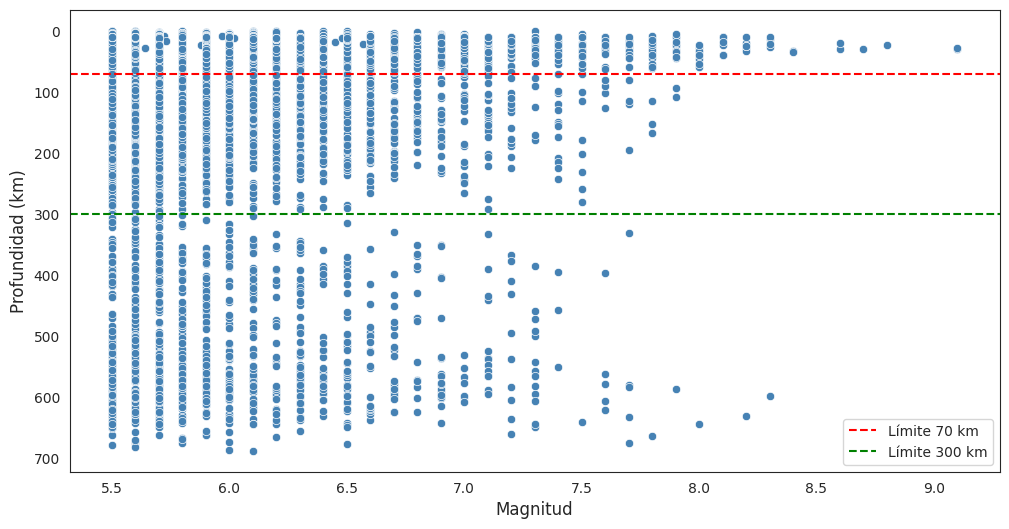

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de dispersión
sns.scatterplot(data=df_mw_family, x='Magnitude', y='Depth', alpha=1, color='steelblue', ax=ax)

# Añadimos líneas de referencia para clasificar la profundidad
# Línea que separa eventos superficiales de intermedios a 70 km
ax.axhline(y=70, color='red', linestyle='--', linewidth=1.5, label='Límite 70 km')

# Línea que separa eventos intermedios de profundos a 300 km
ax.axhline(y=300, color='green', linestyle='--', linewidth=1.5, label='Límite 300 km')

# Opcional: invertir el eje Y para que las profundidades menores (más superficiales) se muestren en la parte superior
ax.invert_yaxis()

# Configuramos los títulos y etiquetas
#ax.set_title('Relación entre Magnitud y Profundidad (Magnitudes MW)', fontsize=14)
ax.set_xlabel('Magnitud', fontsize=12)
ax.set_ylabel('Profundidad (km)', fontsize=12)

# Mostramos la leyenda y el gráfico
ax.legend()
plt.show()

## Evolución de sismos

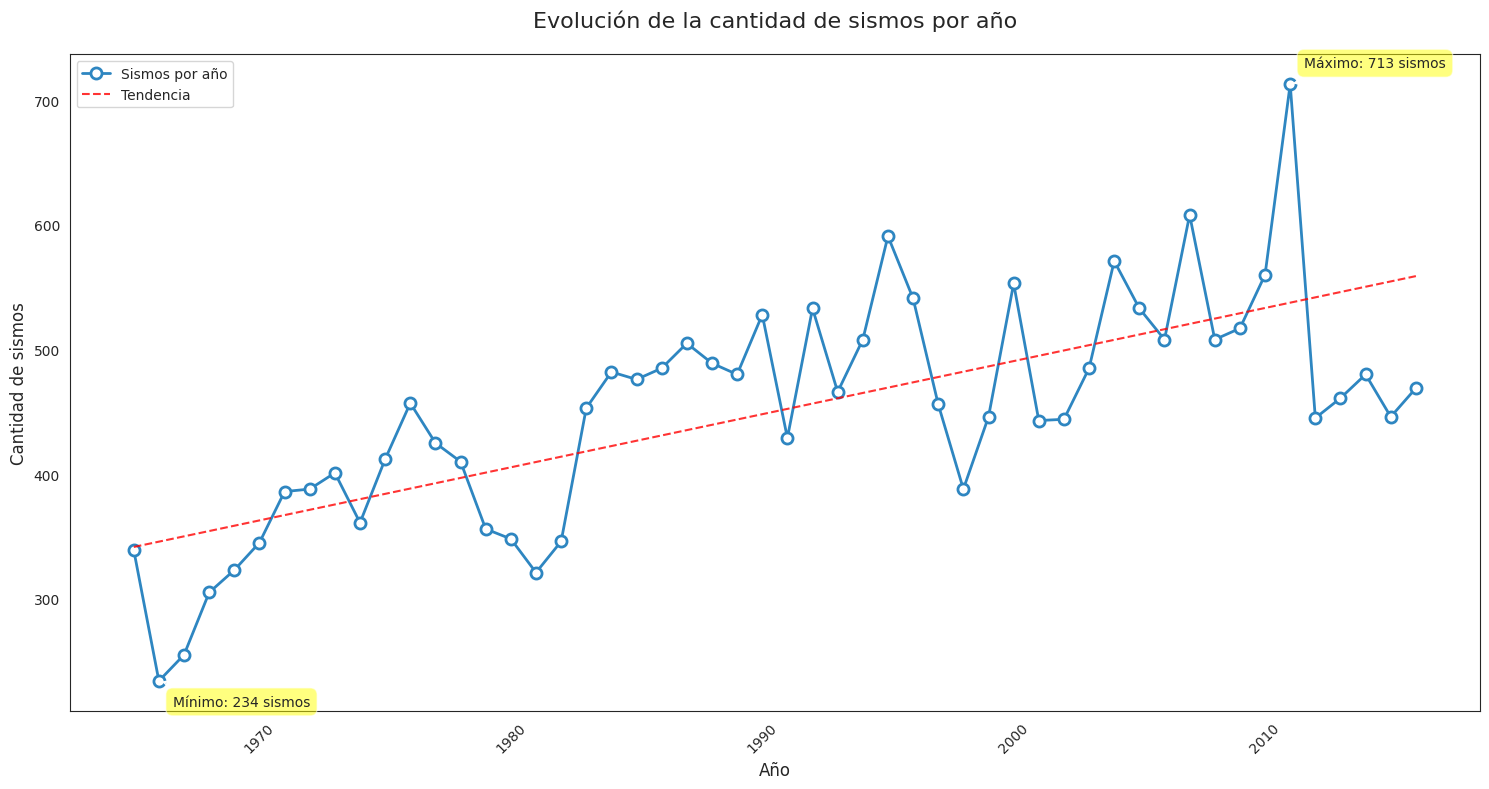


Estadísticas principales:
Año con más sismos: 2011 (713 sismos)
Año con menos sismos: 1966 (234 sismos)
Promedio anual de sismos: 450.2


In [8]:
"""## Cantidad de sismos por año"""

# Agrupamos por año y contamos
sismos_por_anio = df.groupby('Year').size()

plt.figure(figsize=(15, 8))

# Gráfico principal
plt.plot(sismos_por_anio.index, sismos_por_anio.values,
         marker='o',
         linestyle='-',
         linewidth=2,
         markersize=8,
         color='#2E86C1',
         markerfacecolor='white',
         markeredgewidth=2)

# Línea de tendencia
z = np.polyfit(range(len(sismos_por_anio)), sismos_por_anio.values, 1)
p = np.poly1d(z)
plt.plot(sismos_por_anio.index, p(range(len(sismos_por_anio))),
         "r--", alpha=0.8,
         label='Tendencia')

plt.title('Evolución de la cantidad de sismos por año',
          fontsize=16,
          pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de sismos', fontsize=12)

plt.xticks(rotation=45)

# Anotaciones de máximo y mínimo
max_year = sismos_por_anio.idxmax()
min_year = sismos_por_anio.idxmin()

plt.annotate(f'Máximo: {sismos_por_anio[max_year]} sismos',
            xy=(max_year, sismos_por_anio[max_year]),
            xytext=(10, 10),
            textcoords='offset points',
            ha='left',
            va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.annotate(f'Mínimo: {sismos_por_anio[min_year]} sismos',
            xy=(min_year, sismos_por_anio[min_year]),
            xytext=(10, -10),
            textcoords='offset points',
            ha='left',
            va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.legend(['Sismos por año', 'Tendencia'], loc='upper left')
plt.tight_layout()
plt.show()

print(f"\nEstadísticas principales:")
print(f"Año con más sismos: {max_year} ({sismos_por_anio[max_year]} sismos)")
print(f"Año con menos sismos: {min_year} ({sismos_por_anio[min_year]} sismos)")
print(f"Promedio anual de sismos: {sismos_por_anio.mean():.1f}")

## Grafico Animado y Geoespacial

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization library

from plotly.offline import init_notebook_mode, plot, iplot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go # plotly graphical object
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings("ignore")
import os

In [10]:
# Crear clasificaciones de magnitud
bins = [-float('inf'), 3.5, 5.0, 6.0, 7.0, 8.0, float('inf')]
labels = [
    'Micro o menor',
    'Leve',
    'Moderado',
    'Fuerte',
    'Mayor / Devastador',
    'Catastrófico / Megaterremoto'
]

# Asignar la clasificación
df['clasificacion'] = pd.cut(df['Magnitude'], bins=bins, labels=labels, right=False)


df.columns = df.columns.str.lower()

dataset = df[['latitude','longitude','year','clasificacion','magnitude']].copy()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   latitude       23412 non-null  float64 
 1   longitude      23412 non-null  float64 
 2   year           23412 non-null  int64   
 3   clasificacion  23412 non-null  category
 4   magnitude      23412 non-null  float64 
dtypes: category(1), float64(3), int64(1)
memory usage: 754.8 KB


In [11]:
dataset.year.value_counts()

,count
year,
2011,713
2007,608
1995,591
2004,571
2010,560
2000,553
1996,541
1992,533
2005,533


In [12]:
len(dataset)

23412

In [13]:
import plotly.graph_objects as go
import pandas as pd

# Asegúrate de tener el dataset cargado correctamente
# Por ejemplo: dataset = pd.read_csv("ruta/dataset.csv")

# Convertir columna 'year' a string para los sliders
dataset['year'] = dataset['year'].astype(str)

# Colores personalizados
custom_colors = {
    'Micro o menor': 'rgb(150, 150, 150)',       # Gris oscuro (más contraste)
    'Leve': 'rgb(0, 176, 240)',                  # Azul brillante
    'Moderado': 'rgb(0, 255, 100)',              # Verde fosforescente
    'Fuerte': 'rgb(255, 221, 0)',                # Amarillo brillante
    'Mayor / Devastador': 'rgb(255, 0, 0)',      # Rojo puro
    'Catastrófico / Megaterremoto': 'rgb(128, 0, 255)'  # Morado intenso
}

types = list(custom_colors.keys())
years = sorted(dataset['year'].unique())

# Frame base (año inicial)
initial_year = years[0]
initial_df = dataset[dataset['year'] == initial_year]

fig = go.Figure()

# Agregar trazas iniciales por tipo
for ty in types:
    df_ty = initial_df[initial_df['clasificacion'] == ty]
    fig.add_trace(go.Scattergeo(
        lon = df_ty['longitude'],
        lat = df_ty['latitude'],
        mode = 'markers',
        name = ty,
        text = df_ty['magnitude'].astype(str) + ' Mw',
        marker = dict(
            size = 8,
            color = custom_colors[ty],
            line = dict(width=0.5, color='white'),
            opacity = 0.7
        )
    ))

# Crear frames por año
frames = []
for year in years:
    frame_data = []
    df_year = dataset[dataset['year'] == year]
    for ty in types:
        df_ty = df_year[df_year['clasificacion'] == ty]
        frame_data.append(go.Scattergeo(
            lon = df_ty['longitude'],
            lat = df_ty['latitude'],
            mode = 'markers',
            name = ty,
            text = df_ty['magnitude'].astype(str) + ' Mw',
            marker = dict(
                size = 8,
                color = custom_colors[ty],
                line = dict(width=0.5, color='white'),
                opacity = 0.7
            )
        ))
    frames.append(go.Frame(data=frame_data, name=year))

fig.frames = frames

# Layout
fig.update_layout(
    title="Sismos por Año y Clasificación",
    geo=dict(
        showframe=False,
        showland=True,
        showcoastlines=True,
        showcountries=True,
        landcolor='rgb(217, 217, 217)',
        lakecolor='white',
        countrycolor='black'
    ),
    legend=dict(
        title="Clasificación",
        x=0.01,
        y=0.98,
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255,255,255,0.7)',
        bordercolor='black',
        borderwidth=1,
        font=dict(size=12)
    ),
    updatemenus=[dict(
        type="buttons",
        direction="left",
        buttons=[
            dict(label="Play", method="animate", args=[None, {"frame": {"duration": 500, "redraw": False},
                                                              "fromcurrent": True}]),
            dict(label="Pause", method="animate", args=[[None], {"frame": {"duration": 0}, "mode": "immediate"}])
        ],
        pad={"r": 10, "t": 80},
        showactive=False,
        x=0.1,
        y=0,
        xanchor="right",
        yanchor="top"
    )],
    sliders=[dict(
        active=0,
        y=0,
        x=0.1,
        len=0.9,
        pad={"b": 10, "t": 60},
        currentvalue={"prefix": "Año: ", "font": {"size": 16}},
        steps=[dict(method="animate",
                    label=year,
                    args=[[year], {"frame": {"duration": 300, "redraw": False},
                                   "mode": "immediate"}]) for year in years]
    )]
)
# Mostrar animación
from plotly.offline import plot
plot(fig)


'temp-plot.html'

In [16]:
plot(fig, filename='sismos_animacion.html', auto_open=True)

NameError: name 'plot' is not defined

In [17]:
from IPython.display import IFrame
IFrame('/content/sismos_animacion.html', width=1000, height=600)